1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

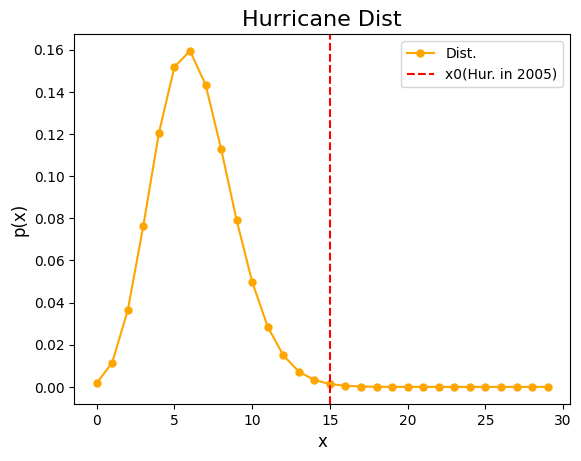

With the significance level 0.05, the rejection start at : 11  x0 : 15
P : 0.0008444930803583883
Obverving 15 hurricanes in the year 2005. We can reject the null hypothesis..
Z score : 3.4661629670697414
P with Z score:  0.0005279431738299246
P is too low. We reject the null hypothesis in this scenario.


In [14]:
from math import sqrt, pi, erf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import poisson
from scipy import optimize
from scipy.optimize import curve_fit



x0 = 15
mean = 6.3

x = np.arange(30)
y = poisson.pmf(x, mean)

plt.ylabel("p(x)", size = 12)
plt.xlabel("x", size = 12)
plt.title("Hurricane Dist", size = 16)
plt.plot(x, y, marker = "o", label = "Dist.", color = "orange", markersize = 5)
plt.axvline(x0, c = 'red', label = 'x0(Hur. in 2005)', ls = '--')
plt.legend()
plt.show()

sig_level = 0.05
reject_point = x[y.cumsum() < 1 - sig_level][-1] + 1
print("With the significance level 0.05, the rejection start at :", reject_point, " x0 :", x0)

p_value = 1 - stats.poisson.cdf(x0, mean)
print("P :", p_value)

print("Obverving 15 hurricanes in the year 2005. We can reject the null hypothesis..")

sigma = np.sqrt(mean)
z = abs(x0 - mean) / sigma
print("Z score :", z)

p_value_new = stats.norm.cdf(-z) + (1 - stats.norm.cdf(z))
print("P with Z score: ", p_value_new)
print("P is too low. We reject the null hypothesis in this scenario.")


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -5.355623844793182


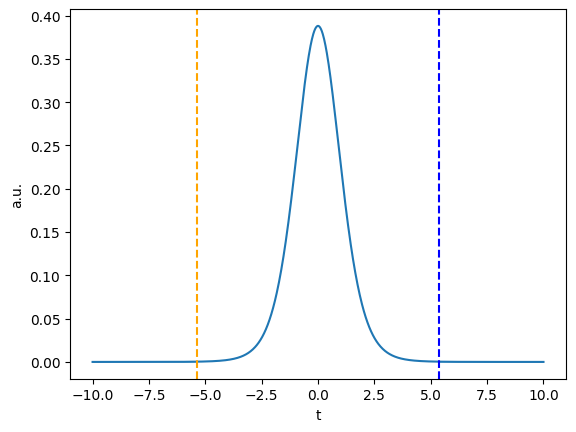

p-value = 0.00045894515934558235


In [3]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma1 = np.sqrt(np.var(pre, ddof=1)) # calculate the variance and its sqrt()
sigma2 = np.sqrt(np.var(post, ddof=1)) # calculate the variance and its sqrt()
sigma = np.sqrt(((sigma1 **2)+(sigma2 **2))/2)
sample_mean1 = np.mean(pre)
sample_mean2 = np.mean(post)
n = len(pre)
T = (sample_mean1 - sample_mean2) / (sigma / np.sqrt(n))
print("T =", T)

xs = np.linspace(-10, +10, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

popt max:  [23.09207142  5.73581557  2.29443164 15.77934503]

pcov max:
 [[ 1.32867537e+00 -1.60423800e-03  1.01480460e-01 -1.08340990e+00]
 [-1.60423800e-03  6.31514260e-03 -2.12233010e-04  1.91648179e-03]
 [ 1.01480460e-01 -2.12233010e-04  2.75441452e-02 -1.70935424e-01]
 [-1.08340990e+00  1.91648179e-03 -1.70935424e-01  1.38433750e+00]]


popt min:  [ 52.64929244   6.16452594   1.97590023 -61.32093749]

pcov min:
 [[ 1.96936391e+00 -8.73505990e-04  2.27187852e-02 -1.05130554e+00]
 [-8.73505990e-04  2.22850049e-03 -4.92554928e-05  1.09102020e-03]
 [ 2.27187852e-02 -4.92554928e-05  5.77327917e-03 -7.06520995e-02]
 [-1.05130554e+00  1.09102020e-03 -7.06520995e-02  1.41330971e+00]]


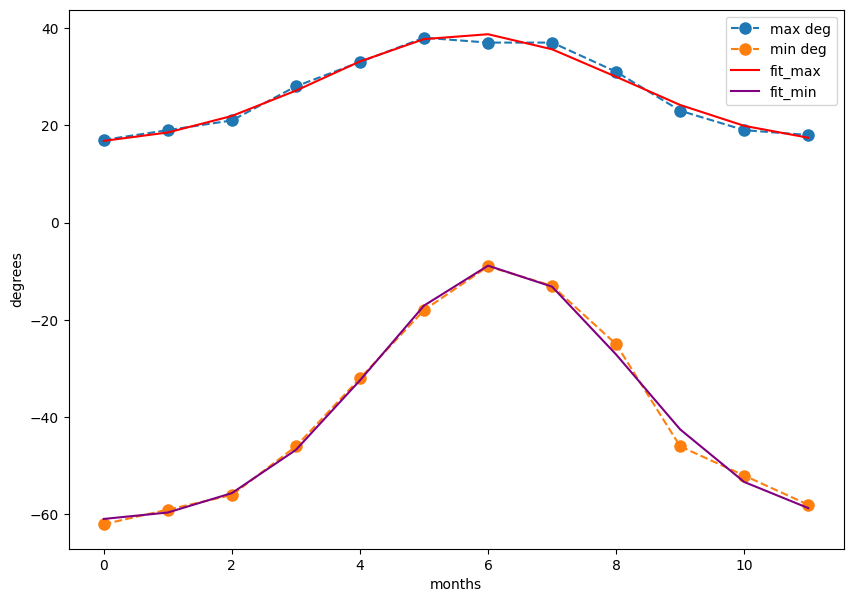

In [6]:
max_deg = [17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
min_deg = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

fig, ax = plt.subplots(figsize=(10, 7))
plt.ylabel("degrees")
plt.xlabel("months")

plt.plot(range(0,12), max_deg, marker="o", markersize = 8, label = "max deg", linestyle = 'dashed')
plt.plot(range(0,12), min_deg, marker="o", markersize = 8, label = "min deg", linestyle = 'dashed')


def gaussian(x, A, x0, sigma, d):
    return A * np.exp( -(x - x0)**2 / (2 * sigma**2)) + d

mean_max = sum(np.arange(12) * max_deg) / sum(max_deg)
sigma_max = np.sqrt(sum(max_deg * (np.arange(12) - mean_max)**2) / sum(max_deg))
popt_max, pcov_max = optimize.curve_fit(gaussian, np.arange(12), max_deg, p0 = [max(max_deg), mean_max, sigma_max, 0])
print("popt max: ", popt_max)
print("\npcov max:\n", pcov_max)

mean_min = sum(np.arange(12) * min_deg)/sum(min_deg)
sigma_min = np.sqrt(sum(min_deg * (np.arange(12) - mean_min)**2) / sum(min_deg))
popt_min, pcov_min = optimize.curve_fit(gaussian, np.arange(12), min_deg, p0 = [max(min_deg), mean_min, sigma_min, 0])
print("\n\npopt min: ", popt_min)
print("\npcov min:\n", pcov_min)

plt.plot(range(0,12), gaussian(range(0,12), *popt_max), color = "red", label = "fit_max")
plt.plot(range(0,12), gaussian(range(0,12), *popt_min), color = "purple", label = "fit_min")
plt.legend()
plt.show()

# As we can see from the plot, the fit is reasonable. Popt and cov matrix are also meaningful.
# Time offset for min and max temperatures within the fit accuracy is not the same.



4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [7]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2023-01-20 00:22:52--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2023-01-20 00:22:52--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbf13afd1125500e4c294ad47f0.dl.dropboxusercontent.com/cd/0/inline/B072zOCmmCHXRj9btU_szH4zddxhOlvn2jk-9lQk0DxhtlNpxuIFy8x0RDZV7fRZDceYReIixdpjBFJfJzLBc7vOqbtqxhQ_9u_MRIvDi-i2S8AVTlX0bDzn7fvvG-LCAHHPu9hdAZ8ZRVyZ0JORf-iqVe5y-kHamCGolXotBenKQA/file# [following]
--2023-01-20 00:22:52--  https://ucbf13afd1125500e4c294ad47f0.dl.dropboxusercontent.com/cd/0/inline/B072zOCmmCHXRj9btU_szH4zddxhOlvn2jk-9lQk0Dxhtl

C:\Users\dehak\AppData\Local\Temp\ipykernel_15320\2759532144.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax.errorbar(x = bin_centers, y = y, yerr = sigma_y, elinewidth = 6, fmt='.k', color = "black", linestyle = "None", label = "Error Bar")


Parameters:  [ 1.26651452e+03 -8.51374528e-02  2.14150947e-01  3.95107055e+01]


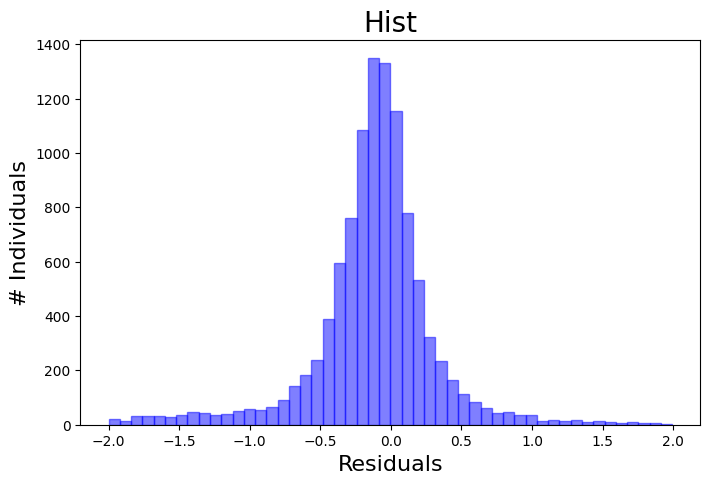

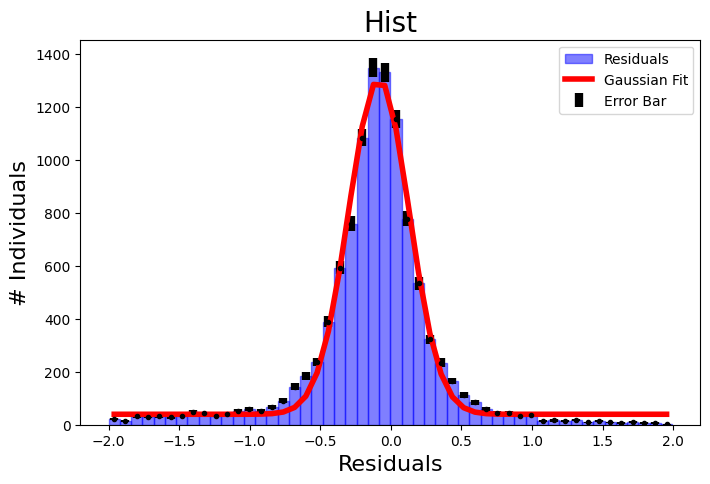

chi2 : 1380.4726695456434
p value : 0.0
P value is  0.0 , which is smaller than 0.05. The fit is not satisfactory


In [10]:
data = pd.DataFrame(dict(pd.read_pickle("residuals_261.pkl").item()))
data = data.loc[abs(data["residuals"]) < 2]

residuals = data["residuals"]

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Hist", fontsize = 20)
ax.set_xlabel("Residuals", fontsize = 16)
ax.set_ylabel("# Individuals", fontsize = 16)
y, bins, _ = plt.hist(residuals, bins = 50, color = "blue", alpha = 0.5, edgecolor = "blue", label = 'Residuals')

fig, ax = plt.subplots(figsize=(8, 5))
ax.set_title("Hist", fontsize = 20)
ax.set_xlabel("Residuals", fontsize = 16)
ax.set_ylabel("# Individuals", fontsize = 16)
plt.hist(residuals, bins = 50, color = 'blue', alpha = 0.5, edgecolor = "blue", label = 'Residuals')

sigma_y = np.sqrt(np.abs(y))
bin_centers = (bins[:-1] + bins[1:]) / 2

def gaussian_func(x, A, x0, sigma, d):
    return A * np.exp( -(x - x0)**2 / (2 * sigma**2)) + d

# not very clear error bar
ax.errorbar(x = bin_centers, y = y, yerr = sigma_y, elinewidth = 6, fmt='.k', color = "black", linestyle = "None", label = "Error Bar")

mean, sigma = stats.norm.fit(y)
popt, pcov = optimize.curve_fit(gaussian_func, bin_centers, y)
print("Parameters: ", popt)
redefined_y = gaussian_func(bin_centers, *popt)
ax.plot(bin_centers, redefined_y, "red", linewidth = 4, label = "Gaussian Fit")
plt.legend()
plt.show()


# goodness-of-fit test
gaussian_fit = gaussian_func(bin_centers ,*tuple(popt))
ndof = len(bin_centers) - 1
chi2 = np.sum(((y - gaussian_fit)**2) / ndof)
p = 1. - stats.chi2.cdf(chi2, ndof)

print("chi2 :", chi2)
print("p value :", p)

print("P value is ", p, ", which is smaller than 0.05. The fit is not satisfactory")



5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [12]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

--2023-01-20 00:29:19--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2023-01-20 00:29:20--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1a94fd7685d42c087ef4a974f8.dl.dropboxusercontent.com/cd/0/inline/B07EqDRi5J9yjuDZ7-z-gclQoj35v2zuQlqkaysVuiwhh8FU0expyaHQGhRTxQ46-SDhpUDaYjF7f24pWm6VOFpFYXhvDmbxCPJnKEDkjKfLeXIrBxateNMA6Gv11BlGVeWeE53g21RRC-YStX1hBFztw3F2whNIQ5Lq17PQH-wXaQ/file# [following]
--2023-01-20 00:29:20--  https://uc1a94fd7685d42c087ef4a974f8.

Optimal Parameters:  [-9.96203468 12.33174286  9.26282131]

Cov matrix:
 [[ 1.75558202e-02  9.86007561e-07 -2.76510980e-06]
 [ 9.86007561e-07  1.77329886e-04  5.40549118e-08]
 [-2.76510980e-06  5.40549118e-08  8.78853325e-03]]

The overall avg. temperature is:  9.262821311776861

Daily average values of coldest/hottest time of year are:  -0.6992133648773713  /  19.224855988431095


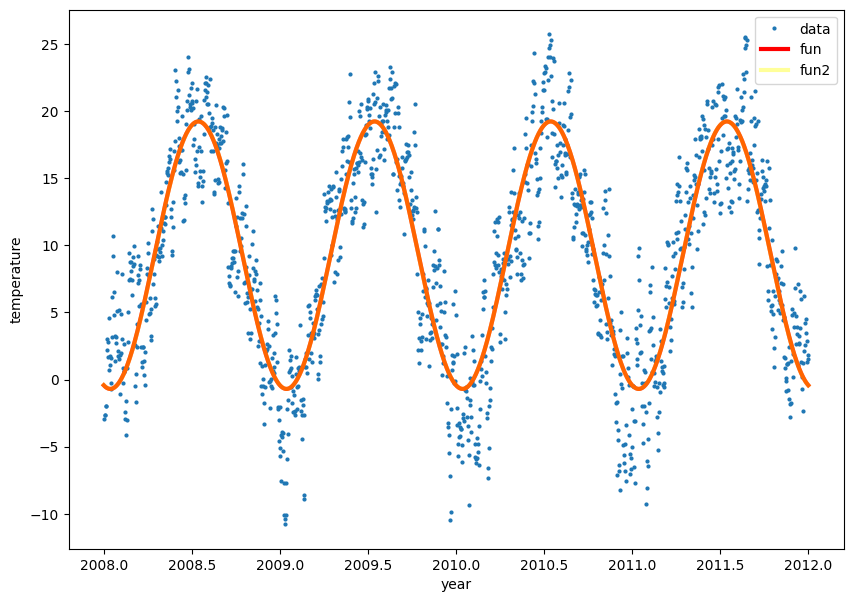

SSR1:  18662.47749843407  SSR2:  18663.716852820216
CL: 1.000 , additional parameter necessary: NO


In [17]:


from scipy.stats import f

df = pd.read_csv("munich_temperatures_average_with_bad_data.txt", sep = ' ', names = ['date','temperature'])

df = df[(df['temperature'] < 80) & (df['date'] < 2012) & (df['date'] >= 2008)]
date = df["date"]
temperature = df["temperature"]

def fun(t, A, b, c):
    return A * np.cos(2 * np.pi * t + b) + c

popt, pcov = optimize.curve_fit(fun, date, temperature)

fig, ax = plt.subplots(figsize=(10, 7))
plt.ylabel("temperature")
plt.xlabel("year")
plt.plot(date, temperature, marker="o", markersize = 2, label = "data", linestyle = "None")

x_lin = np.linspace(2008, 2012, len(temperature))
y = fun(x_lin, *popt)
plt.plot(x_lin, y, color='red', linewidth = 3, label = "fun")

print("Optimal Parameters: ", popt)
print("\nCov matrix:\n", pcov)
print("\nThe overall avg. temperature is: ", popt[2])
print("\nDaily average values of coldest/hottest time of year are: ", (popt[2] + popt[0]), " / ", (popt[2] - popt[0]))

def fun2(t, A, b, c, d):
    return A * np.cos(2 * np.pi * t * b + c) + d

# here, b is the shift parameter. It expands the limit of the function. 
# Without b, we assume that t = 0 every year. But in reality, 
# it is not possible to perform the calculation at the exact same time.

popt2, pcov2 = optimize.curve_fit(fun2, date, temperature)
y2 = fun2(x_lin, *popt2)
plt.plot(x_lin, y2, color='yellow', linewidth = 3, label = "fun2", alpha = 0.4)
plt.legend()
plt.show()

ssr_1 = np.sum((y - temperature)**2)
ssr_2 = np.sum((y2 - temperature)**2)
print("SSR1: ", ssr_1, " SSR2: ", ssr_2)

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL
cl_1_2 = Ftest(ssr_1, ssr_2, 2, 3, len(temperature), verbose=True)

# In the plot, fun and fun2 are exactly at the same spot. 
